# Experiment data analysis - Network growth

### Read the data from csv

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("exp2_internal_variable_growth_data.csv")

print("Experiment data analysis - Network growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDs by sample:", df["n_network"].max())
print("Range of RDDs:", df["n_rdds"].min(),"-", df["n_rdds"].max())

df.head(20)

Experiment data analysis - Network growth
Number of samples: 1
Number of RDDs by sample: 18
Range of RDDs: 3 - 20


,n_sample,n_network,n_rdds,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,3,18,0.500865,88,0.022499,7,0.007576
1,1,2,4,22,0.401478,61,0.019190,22,0.010545
2,1,3,5,41,0.758028,228,0.058492,25,0.128716
3,1,4,6,26,0.725668,44,0.015486,34,0.011734
4,1,5,7,71,1.405449,442,0.125872,204,0.691271
5,1,6,8,59,0.898615,250,0.080898,468,0.778868
6,1,7,9,71,1.276269,451,0.110654,252,9.632516
7,1,8,10,96,1.397025,658,0.184730,10500,46.481161
8,1,9,11,100,1.626889,645,0.189667,0,0.009156
9,1,10,12,122,1.815141,933,0.238061,21600,290.441289


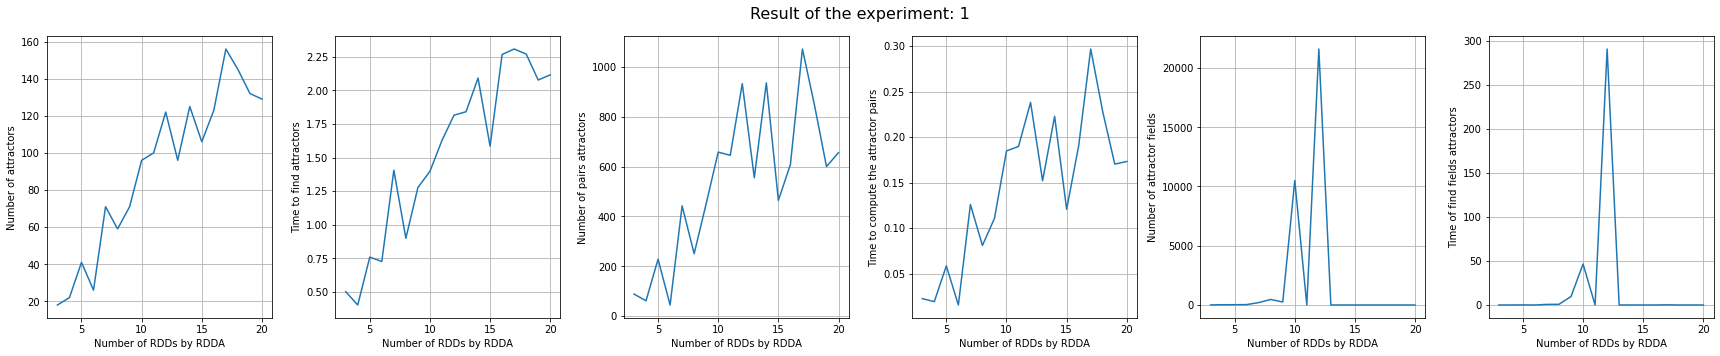

In [37]:
l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[3:]):
        ax.plot(group['n_rdds'], group[key])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the experiment: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

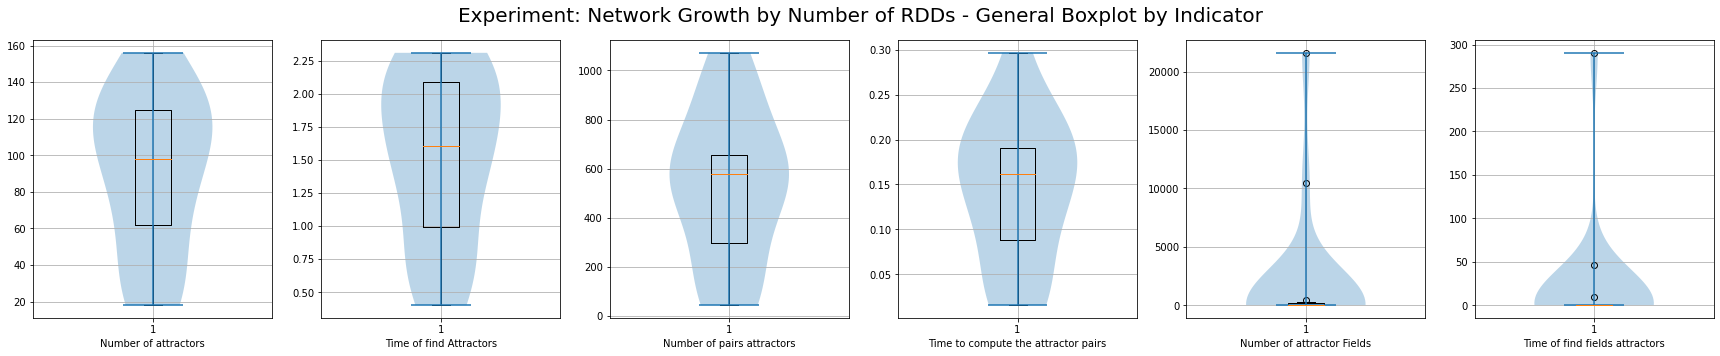

In [36]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,5))
cont_label = 0
for (key,ax) in zip(df.keys()[3:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Network Growth by Number of RDDs - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of RDDs

KeyError: 3

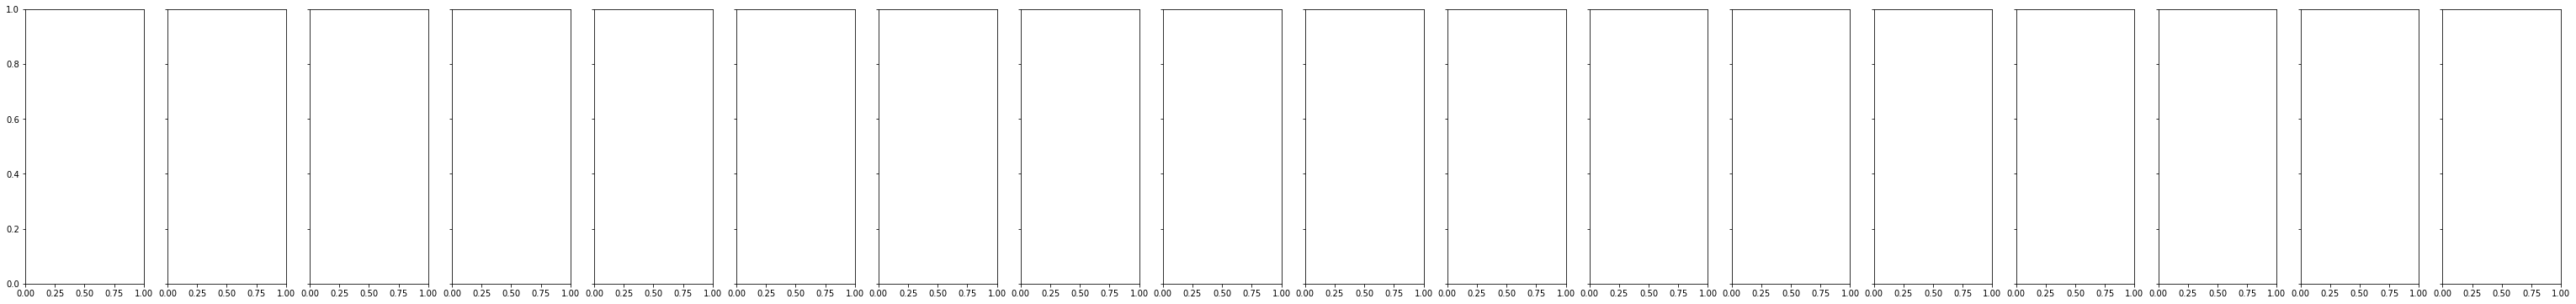

In [35]:
n_rdds = df['n_rdds'].unique()
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[3:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_sample")

for key in df.keys()[3:]:
    fig, axs = plt.subplots(1, n_rdds.size, figsize=(n_rdds.size*3,6), sharey=True)
    for ax, n_rdd in zip(axs, n_rdds):
        group = grouped.get_group(n_rdd)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        #if log_scale[key]:
        #ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of RDDs: {n_rdd}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)